In [1]:
import sys
import numpy as np
sys.path.append('../../../nn')
from mynn import *
from mydata import *
from datetime import datetime

import matplotlib as mpl 
from matplotlib.lines import Line2D 
# mpl.use('TkAgg')
import matplotlib.pyplot as plt

plt.rc("figure", dpi=300)           # High-quality figure ("dots-per-inch")
plt.rc("text", usetex=True)         # Crisp axis ticks
plt.rc("font", family="serif")      # Crisp axis labels
plt.rc("legend", edgecolor='none')  # No boxes around legends

plt.rc("figure",facecolor="#ffffff")
plt.rc("axes",facecolor="#ffffff",edgecolor="#000000",labelcolor="#000000")
plt.rc("savefig",facecolor="#ffffff")
plt.rc("text",color="#000000")
plt.rc("xtick",color="#000000")
plt.rc("ytick",color="#000000")

color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

M = 20000
N_neurons = 256
layers    = 4
batch_size = 16


ntrain = M//2
N_theta = 100


problem = "Solid"




model = torch.load("DeepFFONetNet_" + str(N_neurons) + "Nd_" + str(ntrain) + ".model", map_location=device)
model.to(device)

trunk = model.trunk_forward().detach().cpu().numpy()
U, S, V = np.linalg.svd(trunk, full_matrices=False)


DeepONetPCA_data = np.zeros((trunk.shape[0], 2*4))
for i in range(4):
    DeepONetPCA_data[:, 2*i]   = trunk[:, 10*i+1] 
    DeepONetPCA_data[:,2*i+1] = U[:, i] 
    
np.save("DeepONetPCA_data.npy", DeepONetPCA_data)

## Load data and plot

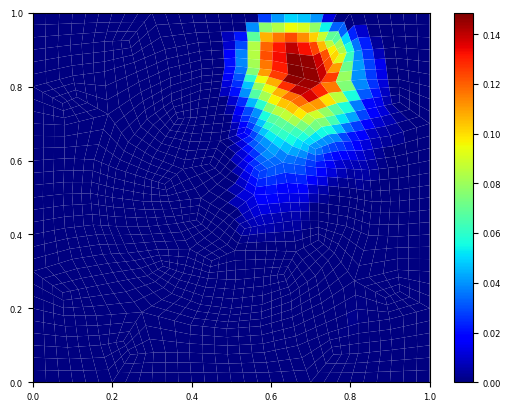

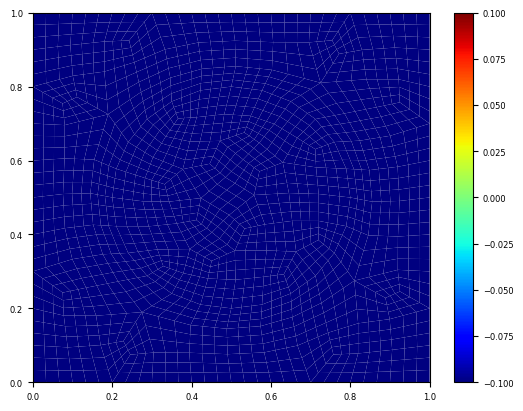

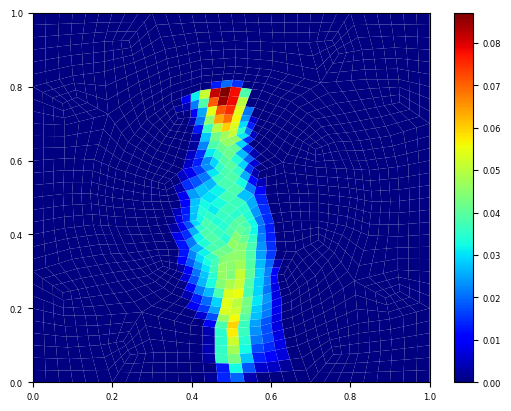

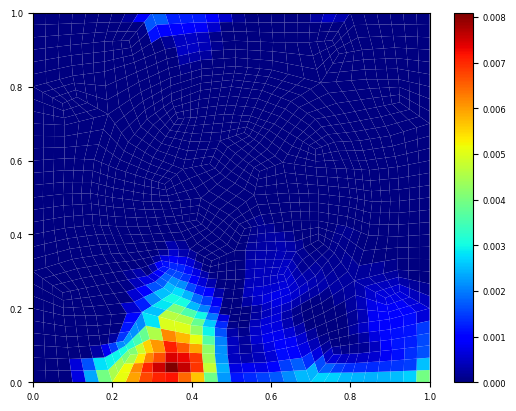

┌ Warning: Jobs are not finished!!! Users need to compute EBC, g, NBC, f.
└ @ NNFEM /home/dzhuang/Code/NNFEM.jl/src/utils/io.jl:231


In [1]:
using NPZ
using LinearAlgebra
using PyPlot
include("../../../plotdefaults.jl")

using Random, Distributions
include("../../src/PlatePull.jl")


DeepONetPCA_data = npzread("DeepONetPCA_data.npy")
problem = "Solid"
    

porder = 2
θ = rand(Normal(0, 1.0), 100);
filename = "../../src/square-circle-coarse-o2"
domain, Fn = ConstructDomain(porder, θ, filename)
ngp = Int64(sqrt(length(domain.elements[1].weights)))


for i = 1:4 

    fig, ax = PyPlot.subplots()
    visσ(domain, ngp, σ=DeepONetPCA_data[:, 2*i-1], ax = ax, mycolorbar=true)
    fig.savefig(problem*"DeepONet-Trunk-"*string(i)*".png")

end 



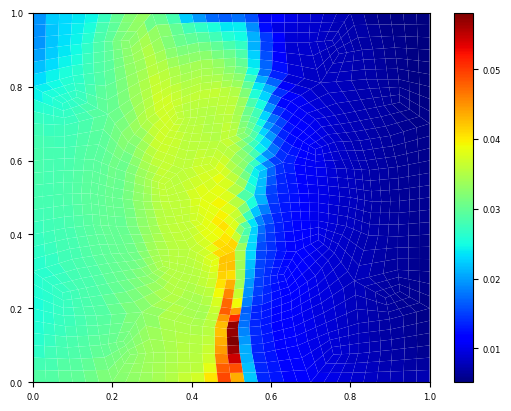

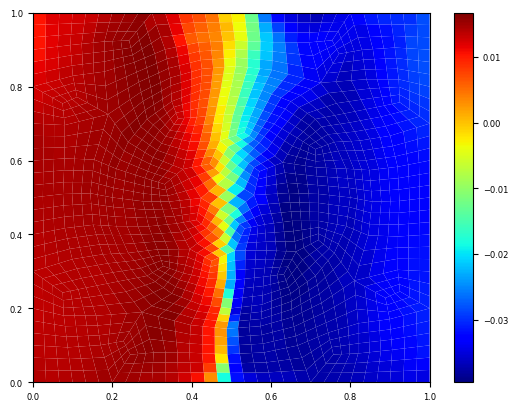

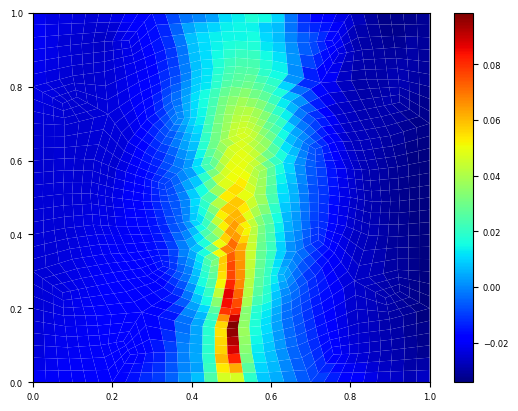

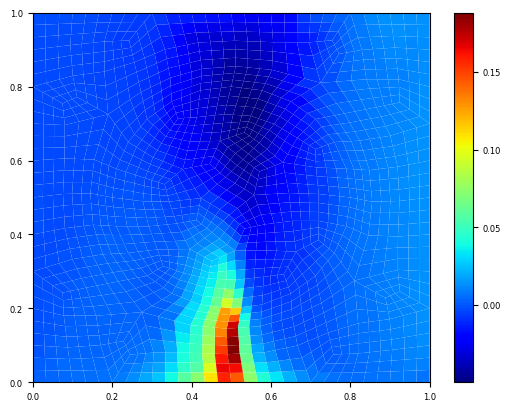

In [2]:
for i = 1:4

    fig, ax = PyPlot.subplots()
    visσ(domain, ngp, σ=DeepONetPCA_data[:, 2*i], ax = ax, mycolorbar=true)
    fig.savefig(problem*"DeepONet-Trunk-PCA-"*string(i)*".png")

end 
